In [146]:
%matplotlib inline
import sys
sys.path.append('../../')
from tools import open_file, dataframe, ohlc_chart, norm, load_products
from tools import TDOP

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time

In [193]:
# tdops 데이터로부터 저항성(resistance curve)를 계산하여 리턴함
def Resist(tdops, threshold):
    values = tdops['tdop'].value
    dates = tdops['dates'].value.astype('M8[s]')
    price = tdops['prices'].value
    
    lower = []
    upper = []
    for date, value in zip(dates, values):
        if value.sum() == 0:
            tdop = value
            print(tdop)
        else: 
            tdop = value.cumsum()/value.sum()
        effective = np.where( (1-threshold < tdop) & (tdop < threshold))[0]
        if effective.size> 0:
            lower.append(price[effective.min()])
            upper.append(price[effective.max()])
        else:
            lower.append(lower[-1] if lower else np.nan)
            upper.append(upper[-1] if upper else np.nan)
    return (lower,upper)

In [143]:
TDOP.get_resist(0.98)

In [174]:
symbol = 'FBTP'
pinfo = load_products()[symbol]
ohlc_raw = open_file('h5py', 'raw data/daily_futures.h5', mode='r')
tdop_raw = open_file('h5py', 'tdops/tdops_decay_7.h5', mode='r')[symbol]

name = list(filter(lambda x: x.attrs['symbol']==symbol, ohlc_raw.values()))[0].name
ohlc = dataframe(name, ohlc_raw)

In [194]:
resist_98 = Resist(tdop_raw, 0.85)
#resist_97 = Resist(tdop_raw, 0.90)

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.

In [186]:
resist_98[0]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 70.549999999999997,
 70.549999999999997,
 70.420000000000002,
 70.430000000000007,
 70.5,
 70.640000000000001,
 70.920000000000002,
 70.890000000000001,
 71.060000000000002,
 71.159999999999997,
 71.099999999999994,
 70.730000000000004,
 70.790000000000006,
 70.810000000000002,
 70.810000000000002,
 70.840000000000003,
 70.879999999999995,
 70.920000000000002,
 70.950000000000003,
 70.859999999999999,
 70.900000000000006,
 70.730000000000004,
 70.650000000000006,
 70.340000000000003,
 70.25,
 70.299999999999997,
 70.329999999999998,
 70.349999999999994,
 70.42000000

In [183]:
np.array([np.nan]).dtype

dtype('float64')

(1.458142, 1.613232)

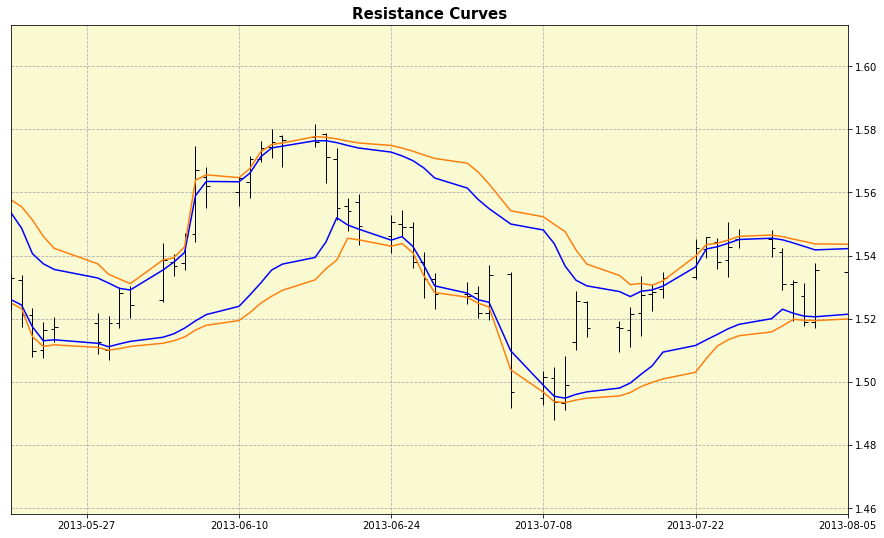

In [158]:
data = ohlc[:]
fig=plt.figure(figsize=(15,9))
ax=fig.add_subplot(111, label="ohlc")
ax = ohlc_chart(ax, data)
ax.plot(data.index, resist_98[0], color='blue')
ax.plot(data.index, resist_98[1], color='blue')

ax.plot(data.index, resist_97[0], color='C1')
ax.plot(data.index, resist_97[1], color='C1')


start = np.datetime64('2013-05-20')
end = np.datetime64('2013-08-05')
ax.set_xlim([start,end])

# display
ax.set_title('Resistance Curves', fontsize=15, fontweight='bold')

min = ohlc.loc[start:end].low.min()*0.98
max = ohlc.loc[start:end].high.max()*1.02
ax.set_ylim([min, max])

In [164]:
data = np.hstack((lower,upper))

In [165]:
data

array([[ 1.8159,  1.833 ],
       [ 1.8027,  1.828 ],
       [ 1.7965,  1.8244],
       ..., 
       [ 1.5666,  1.5827],
       [ 1.5656,  1.5817],
       [ 1.5661,  1.5806]])

In [171]:
lower = np.expand_dims(resist_98[0], axis=1)
upper = np.expand_dims(resist_98[1], axis=1)

In [172]:
lower.shape

(2532, 1)

In [121]:
bottom[1078:]

[10706.0,
 10706.0,
 10706.0,
 10706.0,
 10706.0,
 10706.0,
 10706.0,
 10706.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10550.0,
 10590.5,
 10590.5,
 10590.5,
 10595.0,
 10595.0,
 10595.0,
 10595.0,
 10595.0,
 10595.0,
 10595.0,
 10595.0,
 10595.5,
 10595.5,
 10595.5,
 10595.5,
 10595.5,
 10670.5,
 10670.5,
 10670.5,
 10670.5,
 10670.5,
 10670.5,
 10671.0,
 10676.0,
 10676.0,
 10676.0,
 10676.0,
 10676.0,
 10676.0,
 10903.0,
 10903.0,
 10903.0,
 10903.0,
 10903.0,
 10903.0,
 10903.0,
 10889.0,
 10868.0,
 10868.0,
 10868.0,
 10868.0,
 10868.0,
 10868.0,
 10868.0,
 10868.0,
 10868.0,
 10868.0,
 10868.0,
 10889.0,
 10889.0,
 10903.0,
 10926.0,
 10941.5,
 10943.0,
 10947.0,
 10967.0,
 10994.0,
 10966.0,
 10967.5,
 10970.0,
 10973.0,
 10976.5,
 10951.5,
 10747.0,
 10747.0,
 10747.0,
 10748.0,
 10748.5,
 10749.0,
 10749.5,
 10750.5,
